# Camera and Image
https://docs.opencv.org/3.4/d6/d0f/group__dnn.html

## Face Detection 

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import time

# Face Detection

In [2]:
# Agen/Gender
label = ('Female', 'Male')
face_id = 0

# Emotion
emotion_label = ('Neutral', 'Happy', 'Sad', 'Surprise', 'Anger')

# plot setting
rows = 6
columns = 6
plt.rcParams['figure.figsize'] = (18.0, 18.0)
figsize = (8, 8)

In [3]:
# Read in Model
facenet = cv2.dnn.readNet("models/face-detection-retail-0005.bin",
                          "models/face-detection-retail-0005.xml")

# Read in Model
agenet = cv2.dnn.readNet(
                     "models/age-gender-recognition-retail-0013.bin",
                     "models/age-gender-recognition-retail-0013.xml")

# Read in Model
emonet = cv2.dnn.readNet("models/emotions-recognition-retail-0003.bin",
                         "models/emotions-recognition-retail-0003.xml")


Time Spent 0.7725822925567627


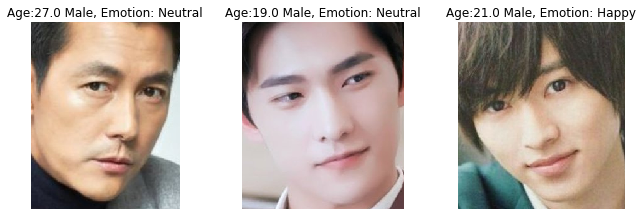

In [4]:

start = time.time()

frame = cv2.imread("face1.jpg")
person_blob = cv2.dnn.blobFromImage(frame)
facenet.setInput(person_blob)
person_out = facenet.forward()

for detection in person_out.reshape(-1, 7):
    confidence = float(detection[2])
    xmin = int(detection[3] * frame.shape[1])
    ymin = int(detection[4] * frame.shape[0])
    xmax = int(detection[5] * frame.shape[1])
    ymax = int(detection[6] * frame.shape[0])
    
    if confidence > 0.4:
        #cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), color=(0, 255, 0),thickness = 1)
        face_crop = frame[ymin-10:ymax+10,xmin-10:xmax+10]
        
        
        # AgeGenderNet
        agebolb = cv2.dnn.blobFromImage(face_crop,size = (62,62)) # Make sure to chceck model's trained image size
        agenet.setInput(agebolb)
        ageout =  agenet.forward(['age_conv3','prob'])
        # Age-Gender Outputs
        age = round(ageout[0].reshape(-1)[0]*100)
        gender = label[np.argmax(ageout[1])]
        #print(ageout[1])
        
        # EmotionNet
        emobolb = cv2.dnn.blobFromImage(face_crop,size = (64,64)) # Make sure to chceck model's trained image size
        emonet.setInput(emobolb)
        emoout =  emonet.forward()    
        # EmotionOutput
        emotion = emotion_label[np.argmax(emoout.reshape(-1))]

        

        ax = plt.subplot(rows, columns, face_id + 1)
        ax.set_title("Age:{:.1f} {}, Emotion: {}".format(age, gender,emotion))
        plt.tight_layout()
        
        face_crop_rgb = cv2.cvtColor(face_crop,cv2.COLOR_BGR2RGB)
        
        plt.imshow(face_crop_rgb)
        plt.axis("off")
        face_id += 1
        
end = time.time()

print("Time Spent",(end-start))
        
#plt.savefig("{}.png".format(xmin+xmax+ymin+ymax+1))

#cv2.imwrite("faceDetectionResult.jpg",frame)